<a href="https://colab.research.google.com/github/M-H-Amini/MachineLearningMini-Summer1399/blob/master/MLmini1_Lec3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Machine Learning *mini* Course
## PythonChallenge.ir
### Mohammad Hossein Amini (mhamini@aut.ac.ir)
# Lecture 3 - SVM
<img src="https://github.com/M-H-Amini/MachineLearningMini-Summer1399/blob/master/stuff/W.jpg?raw=true" width=600>

# Introduction

The theoretical stuff has been discussed in the video lectures. Let's implement a little...

First of all, we should import some modules.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# MNIST Handwritten Digits

A famous dataset in machine learning and deep learning is the *MNIST Handwritten Digits*. It's a collection of about 70000 handwritten digits labeled. One of the ways of comparing different learning algorithms is to evaluate their performance on MNIST dataset.

<img src="https://drive.google.com/uc?id=1WXwOzPYIbfVjKA2ArA2yJz-lLp9DaJ2n" width="300">


First of all, let's import the tiny version of this dataset on colab.

In [15]:
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('sample_data/mnist_test.csv', header=None)

In [16]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The first column of the dataset is the target. So we take the first column as our target take the others as the input.

In [17]:
inputs_train = mnist_train.drop(columns=mnist_train.columns[0])
targets_train = mnist_train[mnist_train.columns[0]]
inputs_test = mnist_test.drop(columns=mnist_test.columns[0])
targets_test = mnist_test[mnist_test.columns[0]]

In [18]:
inputs_train_arr = np.array(inputs_train)
targets_train_arr = np.array(targets_train)
inputs_test_arr = np.array(inputs_test)
targets_test_arr = np.array(targets_test)

It's a good idea to have a function for showing each digit.

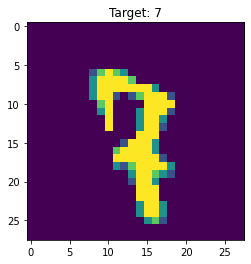

In [23]:
def showDigit(image, target, predicted=None):
  image = np.reshape(image, (28, 28))
  plt.figure()
  if predicted is not None:
    plt.title(f'Target: {target}, Predicted: {predicted}')
  else:
    plt.title(f'Target: {target}')
  plt.imshow(image)
  plt.show()

index = 100
showDigit(inputs_train_arr[index], targets_train_arr[index])

Time to create our *SVM* model and train it. We use Gaussian kernel for it.

In [24]:
model = svm.SVC(kernel = 'rbf', C=100)
model.fit(inputs_train_arr, targets_train_arr)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

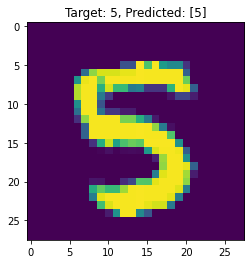

In [27]:
index = 120
predicted = model.predict(inputs_test_arr[index:index+1, :])
showDigit(inputs_test_arr[index], targets_test_arr[index], predicted)

Finally, let's see our performance.

In [28]:
predicted = model.predict(inputs_test_arr)
corrects = 0
wrongs = 0
for i in range(inputs_test_arr.shape[0]):
  if predicted[i] == targets_test_arr[i]:
    corrects += 1
  else:
    wrongs += 1

print(f'Corrects: {corrects}, Wrongs: {wrongs}')
print(f'Accuracy: {corrects/(corrects+wrongs)}')

Corrects: 9759, Wrongs: 241
Accuracy: 0.9759


<img src="https://drive.google.com/uc?id=1J3RkCDoaa87BfIfhuKUSjoJuqVe5wzUz" width="350">

